# [실습] 이변량분석 종합실습

## 환경준비

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [66]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

1) 그래프 : histogram, densityplot

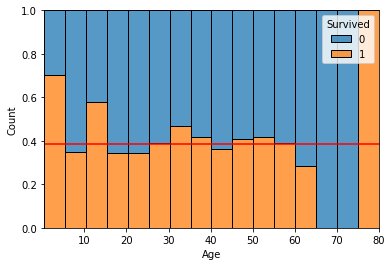

In [78]:
sns.histplot(x='Age', data=titanic, hue=target, multiple='fill', bins=16)
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

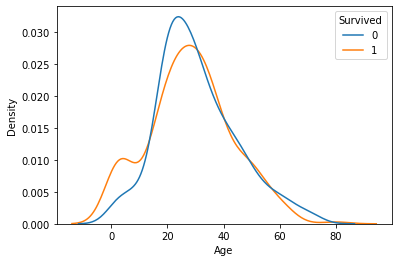

In [9]:
sns.kdeplot(x='Age', data=titanic, hue=target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
temp = titanic.dropna()

In [28]:
model = sm.Logit(temp['Survived'], temp['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.668667
         Iterations 4
Age    0.003333
dtype: float64


3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

1) 그래프 : histogram, densityplot

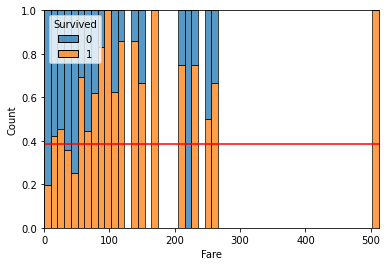

In [80]:
sns.histplot(x='Fare', data=titanic, hue=target, multiple='fill', bins=50)
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

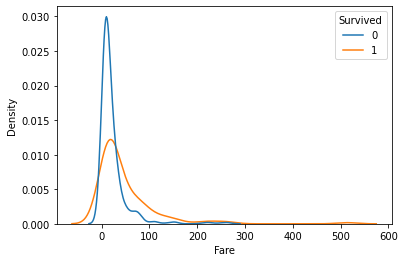

In [30]:
sns.kdeplot(x='Fare', data=titanic, hue=target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [32]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

4) 추가 분석할 내용 정리

In [108]:
bins = [0,10,30,50, np.inf]
labels = ['L2','L1','M','H']
titanic['Fare_Group'] = pd.cut(titanic['Fare'], bins=bins, labels=labels, right=False)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,L2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,H
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,L2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,H
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,L2


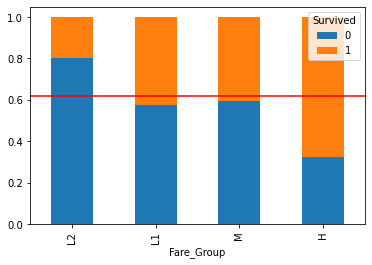

카이제곱통계량 109.28927980021261
p-value 1.5605723946549092e-23


In [111]:
temp = pd.crosstab(titanic['Fare_Group'], titanic['Survived'],normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

table = pd.crosstab(titanic[target], titanic['Fare_Group'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

1) 교차표(pd.crosstab())

In [33]:
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [34]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


2) 시각화( Stacked Bar, Mosaic)

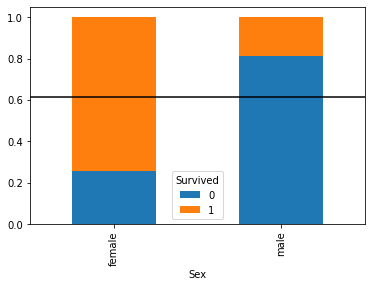

In [35]:
temp = pd.crosstab(titanic['Sex'], titanic['Survived'],normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(),color='k')
plt.show()

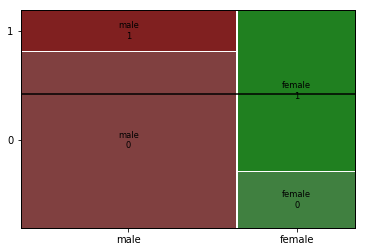

In [36]:
mosaic(titanic,['Sex','Survived'])
plt.axhline(1-titanic['Survived'].mean(),color='k')
plt.show()

3) 가설검정(카이제곱검정)

In [37]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'],titanic['Sex'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
자유도 1
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


4) 관계 평가하기

5) 추가 분석하기

#### ② Pclass --> Survived

1) 교차표(pd.crosstab())

In [38]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [39]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize='index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


2) 시각화( Stacked Bar, Mosaic)

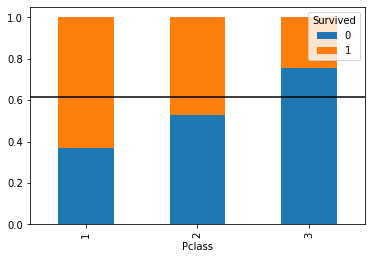

In [40]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'],normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(),color='k')
plt.show()

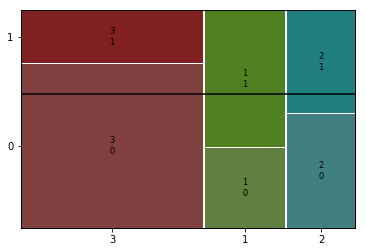

In [41]:
mosaic(titanic,['Pclass','Survived'])
plt.axhline(1-titanic['Survived'].mean(),color='k')
plt.show()

3) 가설검정(카이제곱검정)

In [42]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'],titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
자유도 2
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


4) 관계 평가하기

5) 추가 분석하기

In [81]:
titanic.groupby(['Pclass','Sex'], as_index=False)['Survived'].mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


#### ③ Embarked --> Survived

1) 교차표(pd.crosstab())

In [43]:
pd.crosstab(titanic['Survived'], titanic['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [44]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize='index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.273529,0.088235,0.638235


2) 시각화( Stacked Bar, Mosaic)

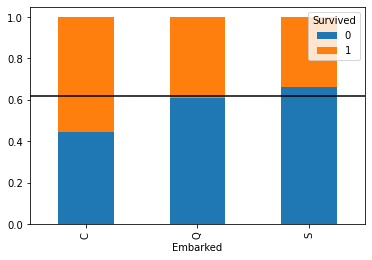

In [45]:
temp = pd.crosstab(titanic['Embarked'], titanic['Survived'],normalize='index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(),color='k')
plt.show()

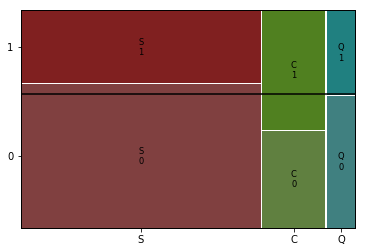

In [46]:
mosaic(titanic,['Embarked','Survived'])
plt.axhline(1-titanic['Survived'].mean(),color='k')
plt.show()

3) 가설검정(카이제곱검정)

In [47]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'],titanic['Embarked'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
----------------------------------------------------------------------------------------------------
카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
자유도 2
기대빈도
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


4) 관계 평가하기

강한관계 - 성별, 객실등급, 운임(범주형).

중간관계 - 나이, 승선지역

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음

# 2.숫자형 Y

## 2.1 보스톤 집값 데이터 : 기본

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [48]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


* target : medv



In [49]:
target = 'medv'

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

1) 시각화 : scatter, jointplot 

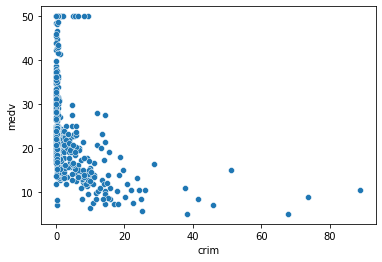

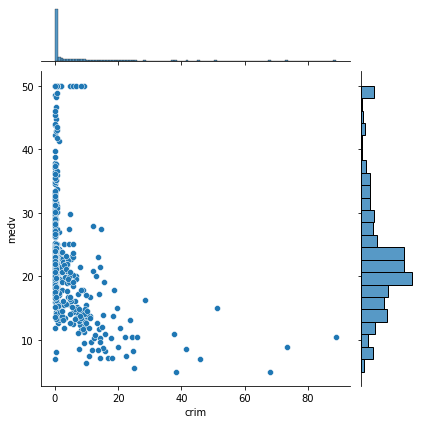

In [54]:
sns.scatterplot(x='crim',y='medv',data=boston)
plt.show()

sns.jointplot(x='crim',y='medv',data=boston)
plt.show()

2) 수치화 : 상관분석

In [55]:
spst.pearsonr(boston['crim'],boston['medv'])

(-0.38830460858681154, 1.1739870821941207e-19)

3) 관계 평가하기

> 범죄율이 높아질수록 집값이 낮아지는 경향이 있다

> 상관계수가 -0.388이므로 중간 정도의 관계

4) 추가 분석할 내용 정리

#### ② ptratio(교사학생 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

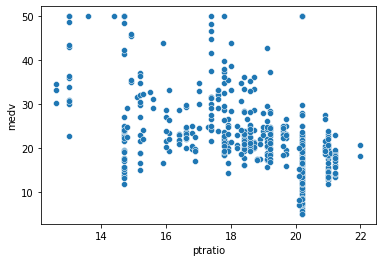

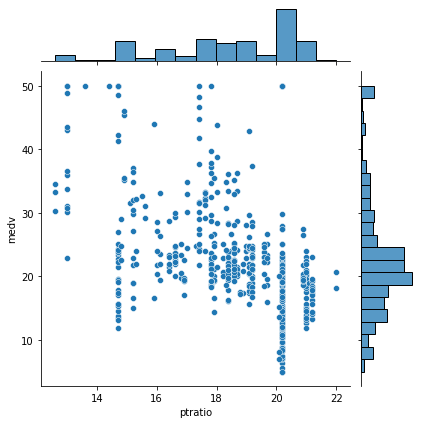

In [57]:
sns.scatterplot(x='ptratio',y='medv',data=boston)
plt.show()

sns.jointplot(x='ptratio',y='medv',data=boston)
plt.show()

2) 수치화 : 상관분석

In [58]:
spst.pearsonr(boston['ptratio'],boston['medv'])

(-0.5077866855375613, 1.6095094784727926e-34)

3) 관계 평가하기

> 상관분석 상으로는 강한 상관관계를 보임

4) 추가 분석할 내용 정리

#### ③ lstat(하위계층 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

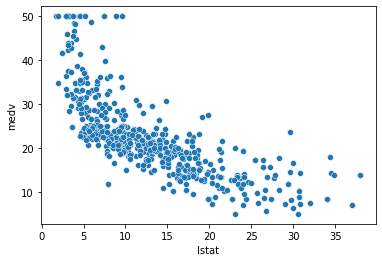

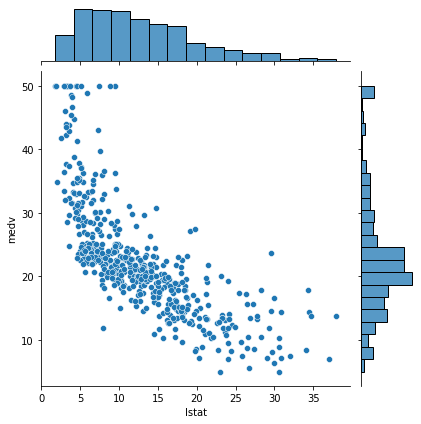

In [60]:
sns.scatterplot(x='lstat',y='medv',data=boston)
plt.show()

sns.jointplot(x='lstat',y='medv',data=boston)
plt.show()

2) 수치화 : 상관분석

In [62]:
spst.pearsonr(boston['lstat'],boston['medv'])

(-0.7376627261740147, 5.081103394387547e-88)

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ④ 추가1 --> medv(집값)

1) 시각화 : scatter, jointplot 

2) 수치화 : 상관분석

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

1) 시각화 : 평균비교 barplot

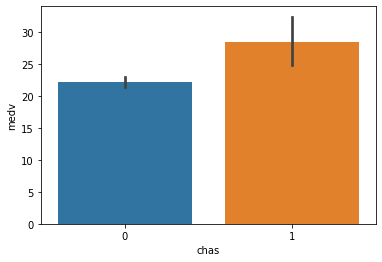

In [82]:
sns.barplot(x='chas',y='medv',data=boston)
plt.show()

2) 수치화 : t-test

In [83]:
chas = boston.loc[boston['chas']==0, 'medv']
nochas = boston.loc[boston['chas']==1, 'medv']

In [84]:
spst.ttest_ind(nochas,chas)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

3) 관계 평가하기

> 관계가 있으나 강하지 않음

4) 추가 분석할 내용 정리

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

In [94]:
boston['zn2'].isna().sum()

0

1) 시각화 : 평균비교 barplot

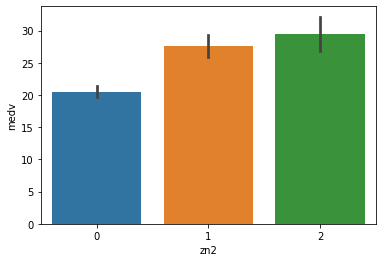

In [87]:
sns.barplot(x="zn2", y="medv", data=boston)
plt.show()

2) 수치화 : anova

In [97]:
boston['zn2'].value_counts()

0    372
1     89
2     45
Name: zn2, dtype: int64

In [105]:
zn0 = boston.loc[boston.zn2 == 0,'medv']
zn1 = boston.loc[boston.zn2 == 1,'medv']
zn2 = boston.loc[boston.zn2 == 2,'medv']

In [107]:
spst.f_oneway(zn0, zn1, zn2)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (3) 관계 정리하기

① 강한관계

> lstat, ptratio, zn2

② 중간관계

> chas, crim

③ 관계없음

## 2.2 car seat 매출 분석 : 심화

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|


In [112]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [113]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

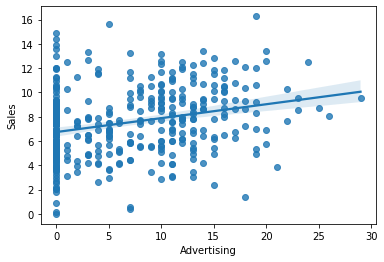

In [117]:
sns.regplot(x='Advertising', y='Sales', data=data)
plt.show()

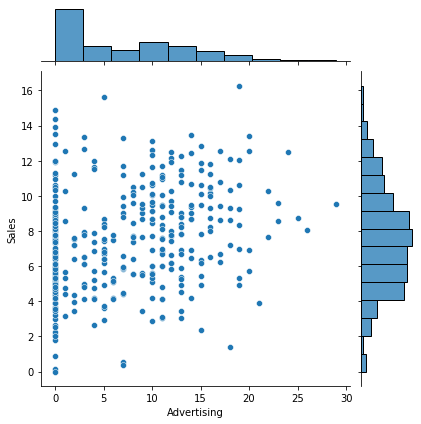

In [118]:
sns.jointplot(x='Advertising', y='Sales', data=data)
plt.show()

2) 수치화 : 상관분석

In [119]:
spst.pearsonr(data['Advertising'],data['Sales'])

(0.2695067813769019, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

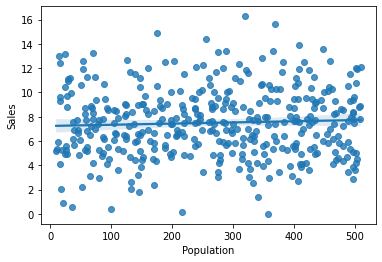

In [120]:
sns.regplot(x='Population', y='Sales', data=data)
plt.show()

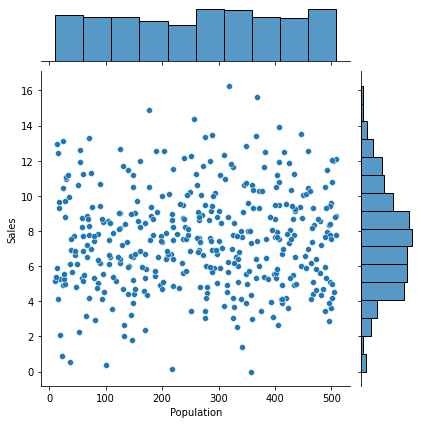

In [121]:
sns.jointplot(x='Population', y='Sales', data=data)
plt.show()

2) 수치화 : 상관분석

In [122]:
spst.pearsonr(data['Population'],data['Sales'])

(0.05047098447203919, 0.31398160931903)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> 큰 관련 없음

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

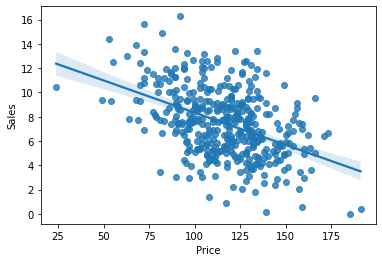

In [123]:
sns.regplot(x='Price', y = target, data = data)
plt.show()

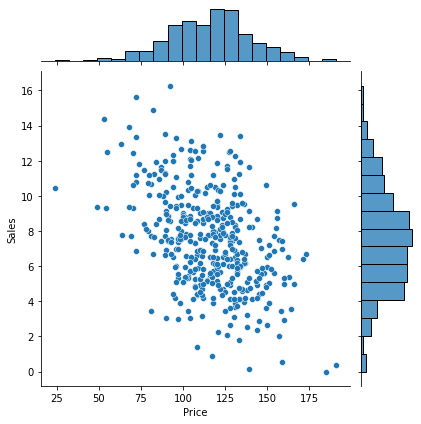

In [124]:
sns.jointplot(x='Price', y='Sales', data=data)
plt.show()

2) 수치화 : 상관분석

In [125]:
spst.pearsonr(data['Price'],data['Sales'])

(-0.44495072784657264, 7.618187011912723e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

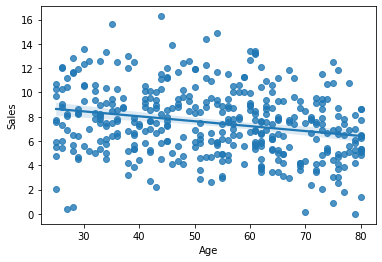

In [127]:
sns.regplot(x='Age', y='Sales', data=data)
plt.show()

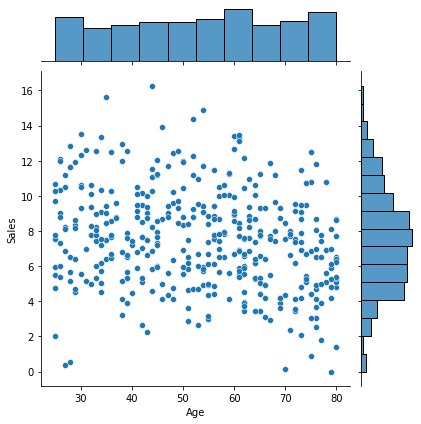

In [128]:
sns.jointplot(x='Age', y='Sales', data=data)
plt.show()

2) 수치화 : 상관분석

In [129]:
spst.pearsonr(data['Age'],data['Sales'])

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

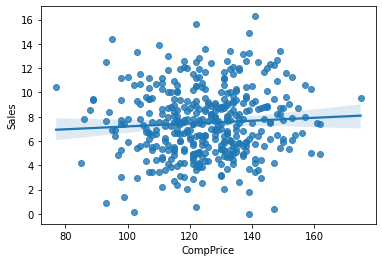

In [130]:
sns.regplot(x='CompPrice', y='Sales', data=data)
plt.show()

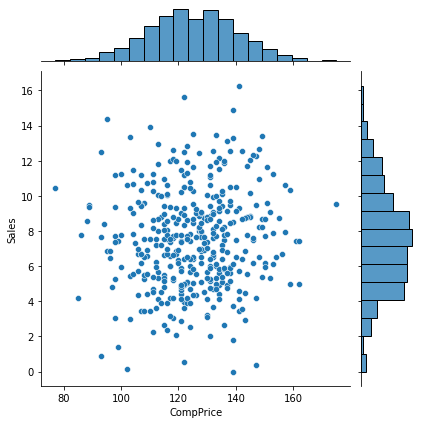

In [131]:
sns.jointplot(x='CompPrice', y='Sales', data=data)
plt.show()

2) 수치화 : 상관분석

In [132]:
spst.pearsonr(data['CompPrice'],data['Sales'])

(0.06407872955062156, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

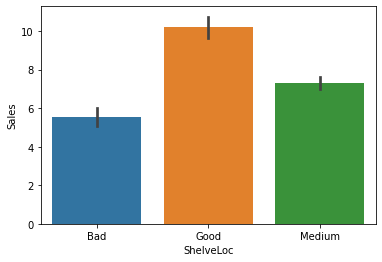

In [136]:
sns.barplot(x='ShelveLoc',y='Sales',data=data)
plt.show()

2) 수치화 : t-test, anova

In [137]:
s0 = data.loc[data.ShelveLoc == 'Bad','Sales']
s1 = data.loc[data.ShelveLoc == 'Medium','Sales']
s2 = data.loc[data.ShelveLoc == 'Good','Sales']

spst.f_oneway(s0,s1,s2)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

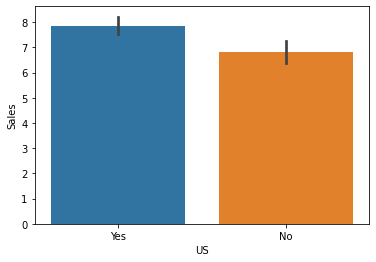

In [133]:
sns.barplot(x='US',y='Sales',data=data)
plt.show()

2) 수치화 : t-test, anova

In [135]:
y = data.loc[data['US']=='Yes', 'Sales']
n = data.loc[data['US']=='No', 'Sales']

spst.ttest_ind(y,n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) 관계 정리하기

① 강한관계

> Price, ShelveLoc

② 중간관계

> Advertising, Age, US

③ 관계없음

> Population, CompPrice